# COVID 19 for Cook County, Illinois
Author: Trang Tran

## Objective

Taking New York Times Covid-19 github repository as input to produce output for Cook County Illinois with these information for every date:

date,county,state,fips,new_cases,new_deaths,cummulative_cases,cummulative_deaths

Further analysis and visualization will be carried out as well.

## Import library used for the code
All of library modules that will be used in the assignment are loaded in the following cell. For this assignment, pandas library is used to load, extract, and manipulate the dataset.

A matplotlib.pyplot library is also imported to visualize the data in the later part

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the csv file as input
The csv file downloaded from the New York Times COVID-19 github repository is loaded to the dataframe using the pandas library. The Download link is below:

https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

## Filter the data for Cook County, Illinois
After loading to the dataframe, the dataset is filtered for Cook county and the state of Illinois

In [3]:
data_filter=data[(data['county']=="Cook")&(data['state']=="Illinois")]

## Output data to csv file
After filtering data for Cook County in Illinois, the dataframe is extracted with the output as a csv file

In [4]:
data_filter.to_csv('Cook-Illinois.csv',index=False)

# Data Overview

Data exploration is carried out to have an overview of the dataset. It is shown that the data contains some missing values. Details are decribed below

In [5]:
#Check if nulls are in the dataset
data.isnull().values.any()

True

Missing values are in the fips and deaths columns. Fips column contain 11695 null values and deaths columns contain 28199 null values

In [6]:
data.isnull().sum()

date          0
county        0
state         0
fips      11754
cases         0
deaths    28355
dtype: int64

However, there are no null values in the filtered dataframe for Cook county in Illinois. Therefore, we do not need a strategy to handle the missing data for our dataset.

In [7]:
data_filter.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [8]:
data[(data.isnull().any(axis=1))&(data['county']=="Cook")&(data['state']=="Illinois")]

,date,county,state,fips,cases,deaths


# Sanity Checked

## Approach 1- Checking number of rows:
Since every row contains information of COVID cases for each county in each state per day, we can check the starting date of the first case in Cook county and calculate how many days from then to the date of analysis. If the number of days are the same as the number of rows in the output then the data contains information for only Cook county, Illinois. For example, if the start date is January 24th 2020, and the date of analysis is April 30th 2021, the number of rows should be 463 (the same as the number of days).


Firstly, the data_filter datafrane is printed out in order to check. From the overview of the dataframe you can see Cook county and Illinois state in the printing dataframe. Then, the number of rows is checked to make sure it is consistent with the number of days.

In [9]:
data_filter

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0
...,...,...,...,...,...,...
1268418,2021-04-29,Cook,Illinois,17031.0,533297,10497.0
1271665,2021-04-30,Cook,Illinois,17031.0,534462,10507.0
1274912,2021-05-01,Cook,Illinois,17031.0,535614,10515.0
1278159,2021-05-02,Cook,Illinois,17031.0,536384,10525.0


In [10]:
date_start=data_filter['date'].min()
print('The start date for Cook county, Illinois is:', date_start)

The start date for Cook county, Illinois is: 2020-01-24


According to Wikipedia (https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Illinois), the start date is January 24 2020. This confirms that the start date extracted from the data_filter dataframe is correct

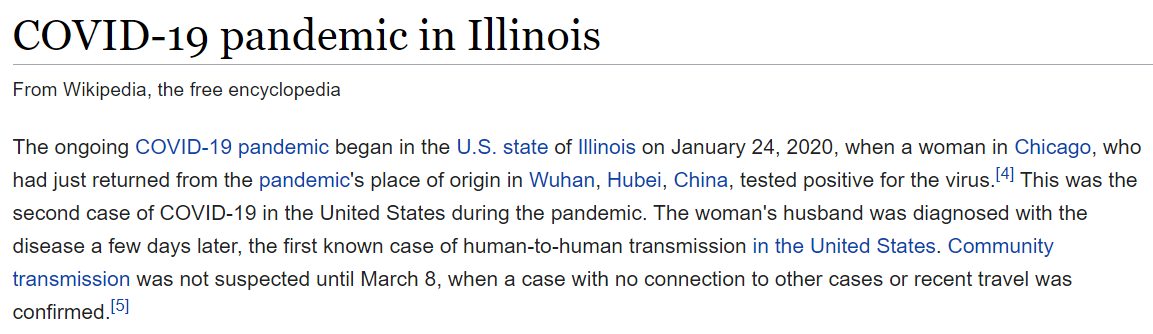

In [11]:
data_filter.shape[0]

466

***The number of rows in the data_filtered confirms that the appropriate information is stored in the dataframe to be extracted***

## Approach 2- Visualization
Another approach to quickly check the output is to visualize the dataset. Visualization is an easy, quick way to spot any anomalies. 

Since the data contains cumulative cases and deaths, the visualization of these features versus time should not decrease over time.

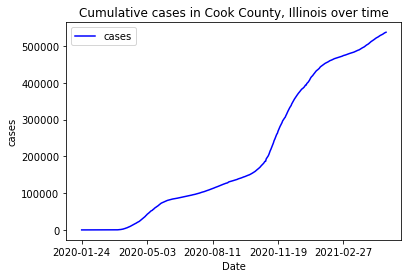

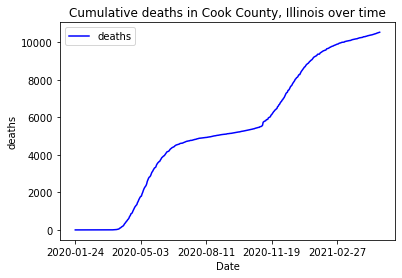

In [12]:
# Visualize the cumulative cases and deaths in Cook County, Illinois
features=['cases','deaths']
for i in features:
    data_filter.plot(x='date', y=i, color='b', label=i)
    plt.xlabel('Date')
    plt.ylabel(i)
    plt.legend()
    plt.title('Cumulative {} in Cook County, Illinois over time'.format(i))
    plt.show()

***Cumulative cases and deaths increase over time. Around May and November, both increase at a faster rate. This matches the time periods when Illiois had their first and second Covid waves.***

# Further Analysis

Further exploration and analysis are carried out to understand the dataset. Since the dataset only contains the cumulative cases and deaths per day, we can explore new cases in Cook county per day. The new cases per day can be calculated by substracting the cumulative cases of the previous day from the current day. The new deaths per day can be calculated in the same way- subtracting cumulative deaths of the previous day from that day.

In order to avoid messing up with the filtered dataframe, we copy it to a new dataframe called data_filter_diff. From there we can add new columns for new cases and new deaths.

In [13]:
data_filter_diff=data_filter.copy(deep=True)
data_filter_diff['new_cases']=data_filter_diff['cases'].diff()
data_filter_diff['new_deaths']=data_filter_diff['deaths'].diff()
data_filter_diff

,date,county,state,fips,cases,deaths,new_cases,new_deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,NaN,NaN
6,2020-01-25,Cook,Illinois,17031.0,1,0.0,0.0,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0,0.0,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0,0.0,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1268418,2021-04-29,Cook,Illinois,17031.0,533297,10497.0,1391.0,15.0
1271665,2021-04-30,Cook,Illinois,17031.0,534462,10507.0,1165.0,10.0
1274912,2021-05-01,Cook,Illinois,17031.0,535614,10515.0,1152.0,8.0
1278159,2021-05-02,Cook,Illinois,17031.0,536384,10525.0,770.0,10.0


***Based on the graphs, there are 2 huge peaks for new cases and new deaths around May and November. This trend is consistent with the cumulative graphs's behaviors shown above. These 2 peaks correspond to the Covid waves that Illinois experienced in May and November.***

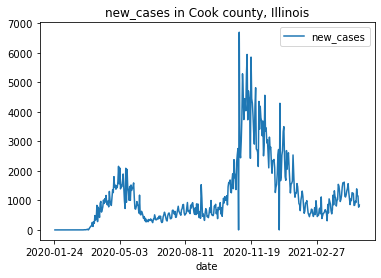

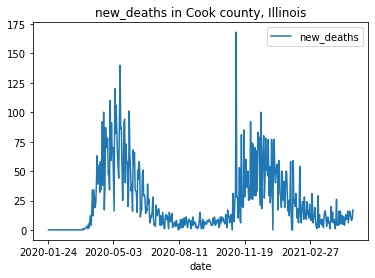

In [14]:
feature_play=['new_cases','new_deaths']
for i in feature_play:
    data_filter_diff.plot(x='date',y=i)
    plt.title("{} in Cook county, Illinois".format(i))
    plt.show()

A graph of new cases versus new deaths is plotted below.***There is no particular relationship between the number of deaths and cases per day.***

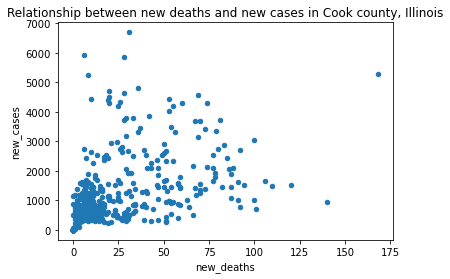

In [15]:
data_filter_diff.plot.scatter(x='new_deaths',y='new_cases')
plt.title("Relationship between new deaths and new cases in Cook county, Illinois")
plt.show()

Since there is no relationship between new cases and new deaths, we take further analysis to examine if there is any relationship between the ratios of deaths/cases versus date.***The ratios of deaths/cases of the wave in May is higher than the ratios for the November wave. This behavior indicates that the handling of the disease improved with time. Even though there are more new cases in November, the response was more effective in terms of treatment.***

In [16]:
data_filter_diff2=data_filter_diff.copy(deep=True)
data_filter_diff2['deaths/cases']=data_filter_diff2['new_deaths'].div(data_filter_diff2.new_cases,axis=0)
data_filter_diff2

,date,county,state,fips,cases,deaths,new_cases,new_deaths,deaths/cases
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,NaN,NaN,NaN
6,2020-01-25,Cook,Illinois,17031.0,1,0.0,0.0,0.0,NaN
11,2020-01-26,Cook,Illinois,17031.0,1,0.0,0.0,0.0,NaN
16,2020-01-27,Cook,Illinois,17031.0,1,0.0,0.0,0.0,NaN
21,2020-01-28,Cook,Illinois,17031.0,1,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
1268418,2021-04-29,Cook,Illinois,17031.0,533297,10497.0,1391.0,15.0,0.010784
1271665,2021-04-30,Cook,Illinois,17031.0,534462,10507.0,1165.0,10.0,0.008584
1274912,2021-05-01,Cook,Illinois,17031.0,535614,10515.0,1152.0,8.0,0.006944
1278159,2021-05-02,Cook,Illinois,17031.0,536384,10525.0,770.0,10.0,0.012987


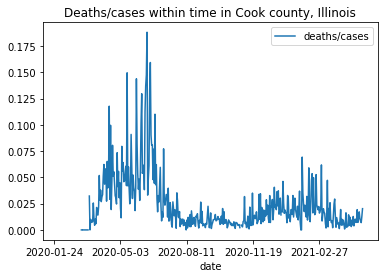

In [17]:
data_filter_diff2.plot(x='date',y='deaths/cases')
plt.title("Deaths/cases within time in Cook county, Illinois")
plt.show()

We can take a step back to see how Cook county's Covid experience compared to other counties in Illinois. Illinois has 102 counties and a population of approximately 12.67 million (2019). Of those counties, Cook has the highest population (aprroximately 5.2 million). Other high population counties are: Dupage, Lake, Will, and Kane. This information is gathered from: https://www.illinois-demographics.com/counties_by_population

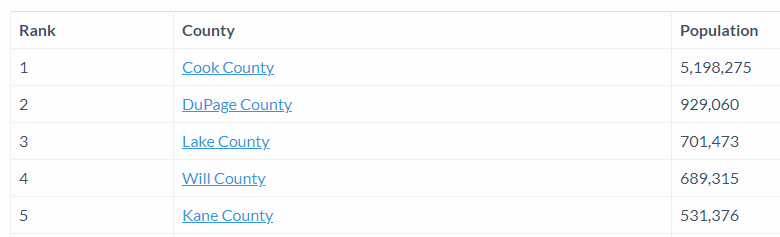

Since the population of Cook county is so high, the trend of COVID's cases and deaths are similar in Illinois overall

In [18]:
data_filter_il=data[data['state']=="Illinois"]
data_filter_il

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0
...,...,...,...,...,...,...
1281489,2021-05-03,Whiteside,Illinois,17195.0,7169,208.0
1281490,2021-05-03,Will,Illinois,17197.0,74284,1053.0
1281491,2021-05-03,Williamson,Illinois,17199.0,7336,140.0
1281492,2021-05-03,Winnebago,Illinois,17201.0,32465,499.0


After filtering the data for Illinois, we calculate the cumulative cases and deaths for each date in Illinois

In [19]:
data_filter_il_groupdate=data_filter_il.groupby(data_filter_il['date']).sum().drop(['fips'], axis=1)
data_filter_il_groupdate.reset_index(inplace=True)
data_filter_il_groupdate

,date,cases,deaths
0,2020-01-24,1,0.0
1,2020-01-25,1,0.0
2,2020-01-26,1,0.0
3,2020-01-27,1,0.0
4,2020-01-28,1,0.0
...,...,...,...
461,2021-04-29,1335559,24252.0
462,2021-04-30,1338687,24291.0
463,2021-05-01,1341493,24330.0
464,2021-05-02,1343273,24358.0


The graphs below show that cumulative cases and deaths in Illinois have similar trends to the ones from Cook county. <b>Analyzing the impacts of COVID on Cook county can help to understand the impacts of the pandemic on the entirety of llinois.<b>

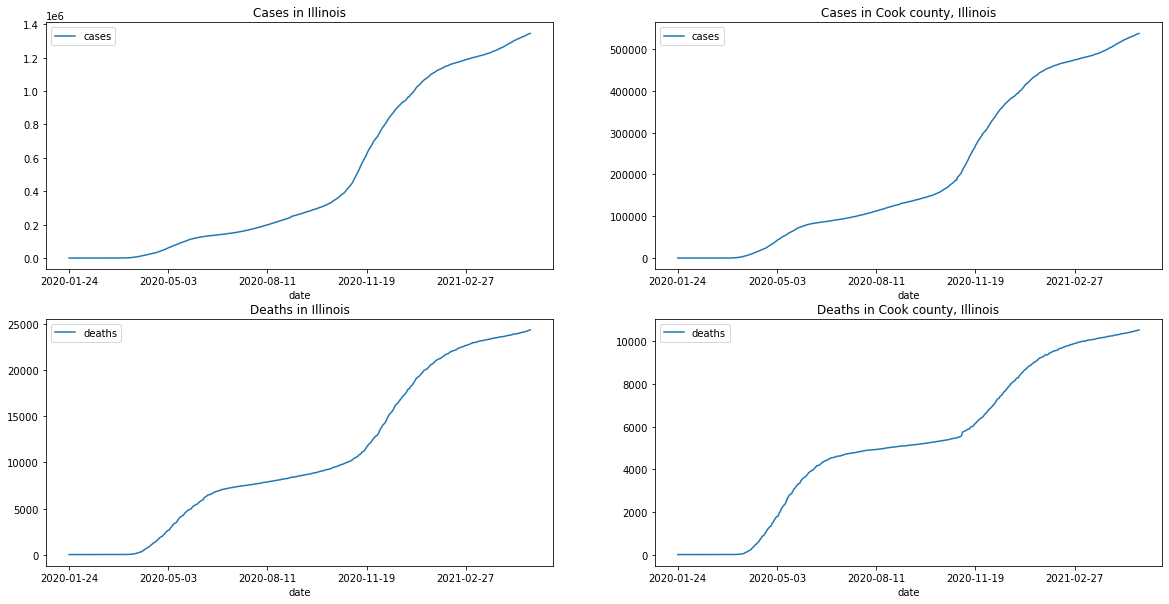

In [20]:
feature_play=['cases','deaths']
fig, axes = plt.subplots(figsize=(20, 10),nrows=2, ncols=2)

for i in range(len(feature_play)):
    data_filter_il_groupdate.plot(x='date',y=feature_play[i],ax=axes[i,0],subplots=True)
    
for i in range(len(feature_play)):
    data_filter.plot(x='date',y=feature_play[i],ax=axes[i,1],subplots=True)

axes[0,0].set_title('Cases in Illinois')
axes[1,0].set_title('Deaths in Illinois')
axes[0,1].set_title('Cases in Cook county, Illinois')
axes[1,1].set_title('Deaths in Cook county, Illinois')

plt.show()

We can also take a look at how cases and deaths in Cook county compare to other counties in Illinois. The cumulative cases on the last day of the dataframe is the total cases in the county. Similarly, the cumulative deaths on the last day of the dataframe is the total deaths in a county. Therefore, we can extract the cumulative cases and deaths on the last day to visualize the data. Since Cook county has almost 50% of the state's population, we can visualize it with the other 4 counties that are in top 5 of the most populated county. Other counties are aggregated to "Other" for better representation in the graph.

In [21]:
#Get the last date of the dataframe
last_date=max(data_filter_il.date)
#Filter out the data contains only the last date in Illinois
data_filter_il_last_date=data_filter_il[data_filter_il['date']==last_date]
#Drop unnecessary columns such as date, state, and fips
data_filter_il_last_date_drop=data_filter_il_last_date.drop(['date','state','fips'], axis=1)
#Aggregate county that is not in top 5 number of cases and calculate the total of cases and deaths for these counties
other=data_filter_il_last_date_drop.sort_values(by=['cases'],ascending=False)\
        .iloc[5:data_filter_il_last_date_drop.shape[0],1:3]\
        .sum()
#Add the total of cases and deaths of the other counties that are not in the top 5 number of cases
data_filter_il_last_date_drop=data_filter_il_last_date_drop.append(other.transpose(),ignore_index=True)
data_filter_il_last_date_drop.iloc[-1,0]='Other'
#Keep the top 5 counties that have the highest number of cases and the Other county
data_filter_il_last_date_clean=data_filter_il_last_date_drop.sort_values(by=['cases'],ascending=False).reset_index(drop=True)\
        .drop(labels=range(6,data_filter_il_last_date_drop.shape[0]), axis=0)
data_filter_il_last_date_clean

,county,cases,deaths
0,Cook,537224.0,10542.0
1,Other,521063.0,9575.0
2,DuPage,89180.0,1353.0
3,Will,74284.0,1053.0
4,Lake,66246.0,1047.0
5,Kane,57486.0,819.0


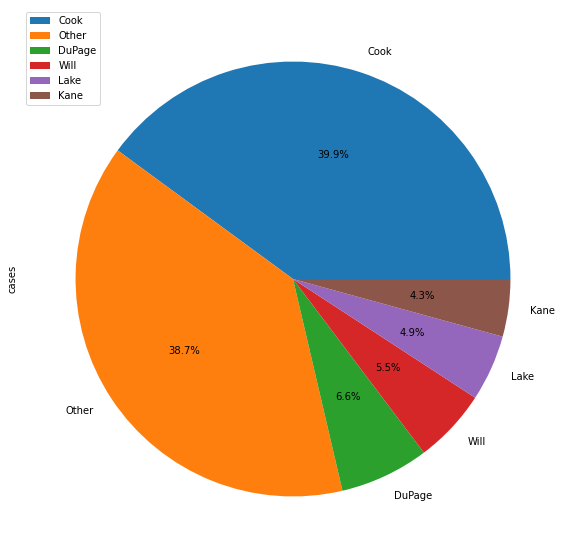

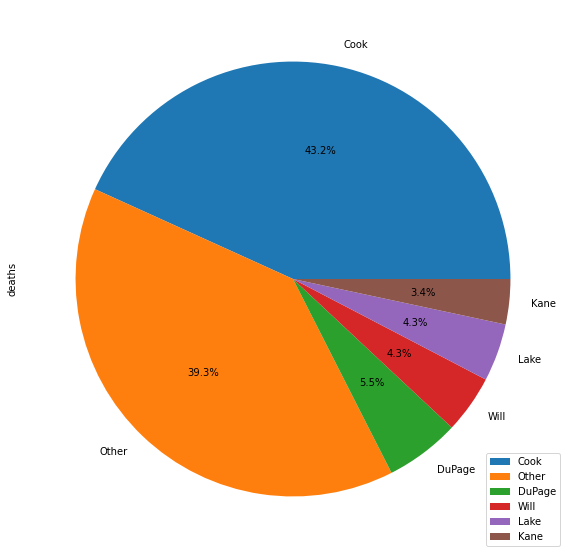

In [22]:
data_filter_il_last_date_clean.set_index('county').plot(kind='pie', y='cases',figsize=(15,10),autopct='%1.1f%%')
data_filter_il_last_date_clean.set_index('county').plot(kind='pie', y='deaths',figsize=(15,10),autopct='%1.1f%%')

***Cook county has almost 40% of the cases in Illinois. Similarly, it has approximately 43% of the deaths in Illinois. Since it has the highest population, most cases/deaths in Illinois are in Cook county.*** 

The dataset contains interesting information for visualization and analysis. ***However, in order to build a good predictive model, one would need more external information such as the populations of the counties or policy changes that can impact the data.***